# Decision Tree & Random Forest Classifier

This notebook demonstrates how to build and evaluate **Decision Tree** and **Random Forest** models using the Social Network Ads dataset.  

---

##  Objective
We aim to predict whether a user purchases a product based on their:
- **Age**
- **Gender**
- **Estimated Salary**

---

##  Steps in this Notebook
1. Data Exploration  
2. Data Preprocessing  
3. Decision Tree Classifier  
4. Random Forest Classifier  
5. Model Comparison  
6. Conclusion


In [1]:
# 📌 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc



In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nani123456789/social-network-ads")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/nani123456789/social-network-ads/versions/1


In [7]:
df = pd.read_csv(path + "/Social_Network_Ads.csv")

In [8]:
# Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
# Basic stats
df.describe()


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
# Missing values check
df.isnull().sum()


,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


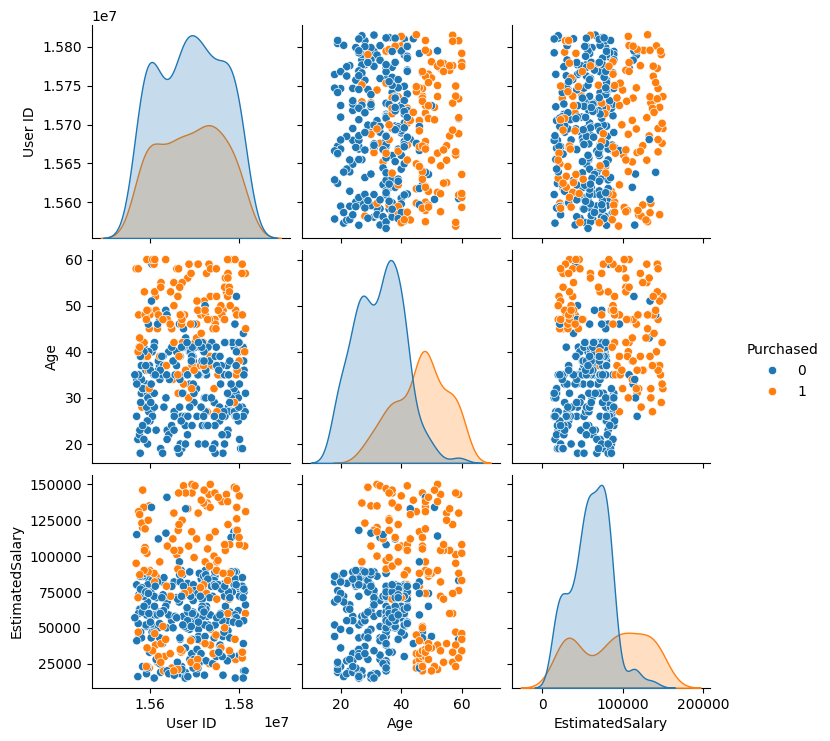

In [11]:
# Feature distributions
sns.pairplot(df, hue='Purchased')
plt.show()


##  Data Preprocessing
- Drop irrelevant columns (`User ID`)  
- Encode categorical variable (`Gender`)  
- Split into train/test sets  


In [12]:
# Drop irrelevant column
df = df.drop("User ID", axis=1)

# Encode Gender (One-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Features and Target
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.head()


,Age,EstimatedSalary,Gender_Male
3,27,57000,False
18,46,28000,True
202,39,134000,False
250,44,39000,False
274,57,26000,False


##  Decision Tree Classifier


In [13]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.825
[[45  7]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        52
           1       0.75      0.75      0.75        28

    accuracy                           0.82        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.82      0.82      0.82        80



In [ ]:
# Visualize the tree
plt.figure(figsize=(15, 8))
plot_tree(dt, feature_names=X.columns, class_names=["Not Purchased", "Purchased"], filled=True)
plt.show()


##  Random Forest Classifier


In [15]:
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.8875
[[47  5]
 [ 4 24]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        52
           1       0.83      0.86      0.84        28

    accuracy                           0.89        80
   macro avg       0.87      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80



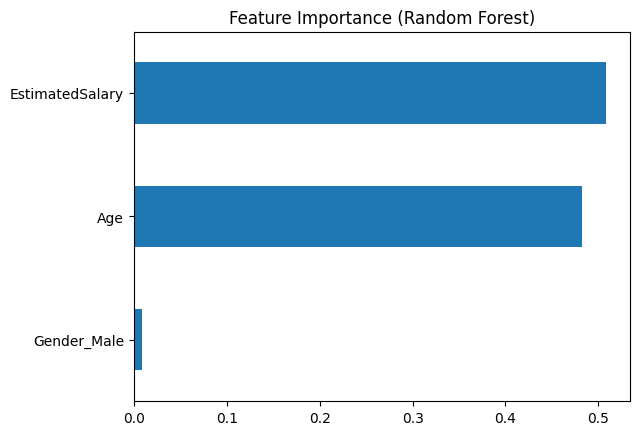

In [16]:
# Feature importance
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns)
feat_imp.sort_values().plot(kind="barh")
plt.title("Feature Importance (Random Forest)")
plt.show()


##  Model Comparison with ROC Curves


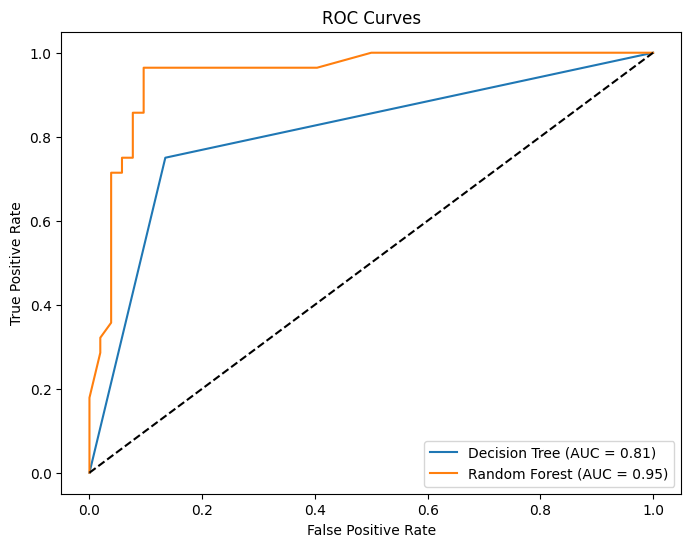

In [17]:
# Decision Tree ROC
probs_dt = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Random Forest ROC
probs_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


## ✅ Conclusion
- The **Random Forest Classifier** performs better than a single Decision Tree in terms of accuracy and stability.  
- Feature importance analysis shows that **Age** and **Estimated Salary** are the most predictive features.  
- Random Forest reduces overfitting and generalizes better than a single tree.  

This project demonstrates the end-to-end process of training and evaluating decision trees and ensemble models on a real dataset.
